In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from urllib.parse import urlencode
import urllib.request, json
from shapely.geometry import Point
from plotnine import *
import contextily as ctx

# Question 1

a. There are 6,467 outliers, defined as datapoints which occurred outside the geographic boundary of NYC.

b. There have been 1,516,140 crashes within the boundaries of NYC. 

c. The number of crashes per borough is as follows: 
 * Brooklyn: 366,243
 * Queens: 309,027
 * Manhattan: 272,459
 * Bronx: 165,430
 * Staten Island: 49,551

In [2]:
API = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv?"

query1 = {'$select': 'count(*) as total',
    '$where': '(LATITUDE > 40.952379 or LATITUDE < 40.478639 or LONGITUDE > -73.720985 or LONGITUDE < -74.353806)'}

df = pd.read_csv(API + urlencode(query1))
df.head()

,total
0,6467


In [3]:
query2 = {'$select': 'count(*) as total',
    '$where': 'LATITUDE <= 40.952379 and LATITUDE >= 40.478639 and LONGITUDE <= -73.720985 and LONGITUDE >= -74.353806'}

df = pd.read_csv(API + urlencode(query2))
df.head()

,total
0,1516140


In [4]:
query3 = {'$select': 'borough, count(*) as total', 
         '$group': 'borough', 
         '$where': 'LATITUDE <= 40.952379 and LATITUDE >= 40.478639 and LONGITUDE <= -73.720985 and LONGITUDE >= -74.353806'}

df3 = df = pd.read_csv(API + urlencode(query3))
print(len(df3))
df3.head()

6


,borough,total
0,BRONX,165430
1,BROOKLYN,366243
2,MANHATTAN,272459
3,QUEENS,309027
4,STATEN ISLAND,49551


# Question 2

Based on this plot, it seems that car accidents were usually fairly consistent by month in NYC between 2012 and 2019, with a general increase and a few random exceptions. However, beginning in early 2020, car accidents dramatically began to decrease. This is almost certainly due to a reduction in drivers because of the COVID-19 pandemic. 

In [5]:
API = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv?"

query4 = {'$select': 'date_trunc_ym(CRASH_DATE) as month , count(*) as total', 
         '$group': 'month',
         '$where': 'LATITUDE <= 40.952379 and LATITUDE >= 40.478639 and LONGITUDE <= -73.720985 and LONGITUDE >= -74.353806',
         '$limit': 1000000}

df4 = pd.read_csv(API + urlencode(query4))
print(len(df4))
df4.head(12)

101


,month,total
0,2012-07-01T00:00:00.000,14438
1,2012-08-01T00:00:00.000,14469
2,2012-09-01T00:00:00.000,14062
3,2012-10-01T00:00:00.000,14235
4,2012-11-01T00:00:00.000,13420
5,2012-12-01T00:00:00.000,14531
6,2013-01-01T00:00:00.000,13225
7,2013-02-01T00:00:00.000,12238
8,2013-03-01T00:00:00.000,14027
9,2013-04-01T00:00:00.000,13965


Text(0, 0.5, '# of Car Accidents')

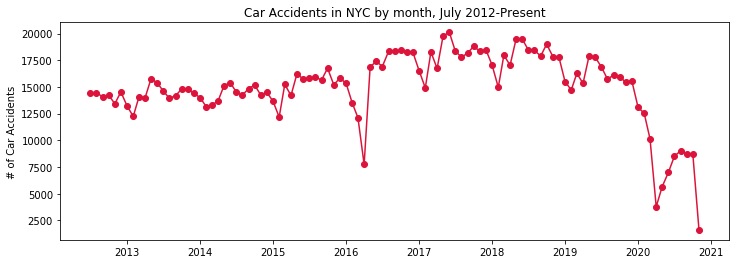

In [6]:
df4['month'] = pd.to_datetime(df4['month'])
df4 = df4.sort_values(by='month')
df4 = df4.set_index('month')

plt.figure(figsize=(12,4))
plt.plot(df4['total'], color='crimson', marker='o')
plt.title('Car Accidents in NYC by month, July 2012-Present')
plt.ylabel('# of Car Accidents')

# Question 3

Based on the data, it seems that the most dangerous time to drive is in the mid-afternoon, with 4 PM registering the highest number of crashes. 

In [40]:
query5 = {'$select': 'CRASH_TIME as crash_time, count(*) as total', 
         '$group': 'crash_time',
         '$where': 'LATITUDE <= 40.952379 and LATITUDE >= 40.478639 and LONGITUDE <= -73.720985 and LONGITUDE >= -74.353806 and date_extract_y(CRASH_DATE) >= 2019 and CRASH_TIME is not null',
         '$limit': 1000000}

df5 = pd.read_csv(API + urlencode(query5))
print(len(df5))
df5.head(24)

1440


,crash_time,total
0,0:00,4327
1,0:01,201
2,0:02,74
3,0:03,65
4,0:04,56
5,0:05,381
6,0:06,44
7,0:07,40
8,0:08,61
9,0:09,44


In [41]:
df5[['hour','minute']] = df5.crash_time.str.split(":",expand=True)
df5.sort_values('hour')
df5.head(30)

,crash_time,total,hour,minute
0,0:00,4327,0,00
1,0:01,201,0,01
2,0:02,74,0,02
3,0:03,65,0,03
4,0:04,56,0,04
5,0:05,381,0,05
6,0:06,44,0,06
7,0:07,40,0,07
8,0:08,61,0,08
9,0:09,44,0,09


In [42]:
df5['hour'] = df5['hour'].astype(int)
df5 = df5.groupby('hour').agg("sum")
df5.head()

,total
hour,
0,10346
1,4948
2,3735
3,3292
4,3552


Text(0, 0.5, '# of Car Accidents')

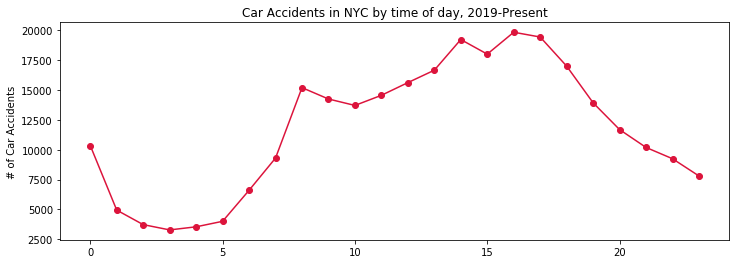

In [44]:
df5 = df5.sort_values(by='hour')

plt.figure(figsize=(12,4))
plt.plot(df5['total'], color='crimson', marker='o')
plt.title('Car Accidents in NYC by time of day, 2019-Present')
plt.ylabel('# of Car Accidents')

# Question 4

The 5 NTAs with the most crashes between June and August 2019 are: 

1. East New York, Brooklyn - 987 crashes
2. Midtown/Midtown South, Manhattan - 941 crashes
3. Park Cemetery, Queens - 893 crashes
4. Hunters Point/Sunnyside/West Maspeth, Queens - 853 crashes
5. Hudson Yards/Chelsea/Flatiron/Union Square - 819 crashes

As for the descriptive statistics of crashes across all NTAs: 

* Mean: 258.15 crashes
* Median: 210 crashes
* Standard Deviation: 173.37 crashes

Overall, the majority of NTAs had under 400 crashes. The greatest number of NTAs are concentrated around 200 crashes (+/- 50) which is close to the mean. However, there were just a small number that had greater than 600 crashes. These NTAs signficantly drag up the mean and standard deviation away from this lower figure. 

In [11]:
ntas = gpd.read_file("../data/Neighborhood Tabulation Areas (NTA)")

print(ntas.crs)
ntas.head()

epsg:4326


,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904872,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712132,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
3,3.0,Brooklyn,047,BK95,Erasmus,1.452260e+07,18756.701865,"POLYGON ((-73.94826 40.63861, -73.94923 40.638..."
4,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335600,"POLYGON ((-73.75726 40.71814, -73.75589 40.716..."


In [12]:
API2 = "https://data.cityofnewyork.us/resource/swpk-hqdp.csv?"

query6 = {'$where': "year='2010'"}

df6 = pd.read_csv(API2 + urlencode(query6))
df6.head()

,borough,year,fips_county_code,nta_code,nta_name,population
0,Bronx,2010,5,BX01,Claremont-Bathgate,31078
1,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
2,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
3,Bronx,2010,5,BX06,Belmont,27378
4,Bronx,2010,5,BX07,Bronxdale,35538


In [13]:
query7 = {'$where': "LATITUDE <= 40.952379 and LATITUDE >= 40.478639 and LONGITUDE <= -73.720985 and LONGITUDE >= -74.353806 and date_extract_y(CRASH_DATE) = 2019 and date_extract_m(CRASH_DATE) <= 8 and date_extract_m(CRASH_DATE) >=6",
         '$limit': 1000000}

df7 = pd.read_csv(API + urlencode(query7))
df7.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-08-24T00:00:00.000,12:00,NaN,NaN,40.689280,-73.796110,"(40.68928, -73.79611)",SUTPHIN BOULEVARD,NaN,NaN,...,NaN,NaN,NaN,NaN,4193813,WINEB,NaN,NaN,NaN,NaN
1,2019-08-10T00:00:00.000,13:50,NaN,NaN,40.766357,-73.781100,"(40.766357, -73.7811)",CLEARVIEW EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4187507,Sedan,NaN,NaN,NaN,NaN
2,2019-07-12T00:00:00.000,14:00,NaN,NaN,40.728603,-74.005325,"(40.728603, -74.005325)",WEST HOUSTON STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4169526,Sedan,NaN,NaN,NaN,NaN
3,2019-07-09T00:00:00.000,17:45,NaN,NaN,40.635582,-73.991550,"(40.635582, -73.99155)",NaN,NaN,13 AVENUE,...,NaN,NaN,NaN,NaN,4167556,Sedan,Bike,NaN,NaN,NaN
4,2019-08-05T00:00:00.000,7:25,NaN,NaN,40.802200,-73.967800,"(40.8022, -73.9678)",BROADWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4183612,Sedan,Sedan,NaN,NaN,NaN


In [14]:
geometry = [Point(xy) for xy in zip(df7['longitude'],df7['latitude'])]
gdf = gpd.GeoDataFrame(df7, crs="EPSG:4326", geometry=geometry)
gdf.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,geometry
0,2019-08-24T00:00:00.000,12:00,NaN,NaN,40.689280,-73.796110,"(40.68928, -73.79611)",SUTPHIN BOULEVARD,NaN,NaN,...,NaN,NaN,NaN,4193813,WINEB,NaN,NaN,NaN,NaN,POINT (-73.79611 40.68928)
1,2019-08-10T00:00:00.000,13:50,NaN,NaN,40.766357,-73.781100,"(40.766357, -73.7811)",CLEARVIEW EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,4187507,Sedan,NaN,NaN,NaN,NaN,POINT (-73.78110 40.76636)
2,2019-07-12T00:00:00.000,14:00,NaN,NaN,40.728603,-74.005325,"(40.728603, -74.005325)",WEST HOUSTON STREET,NaN,NaN,...,NaN,NaN,NaN,4169526,Sedan,NaN,NaN,NaN,NaN,POINT (-74.00532 40.72860)
3,2019-07-09T00:00:00.000,17:45,NaN,NaN,40.635582,-73.991550,"(40.635582, -73.99155)",NaN,NaN,13 AVENUE,...,NaN,NaN,NaN,4167556,Sedan,Bike,NaN,NaN,NaN,POINT (-73.99155 40.63558)
4,2019-08-05T00:00:00.000,7:25,NaN,NaN,40.802200,-73.967800,"(40.8022, -73.9678)",BROADWAY,NaN,NaN,...,NaN,NaN,NaN,4183612,Sedan,Sedan,NaN,NaN,NaN,POINT (-73.96780 40.80220)


In [15]:
ntas = ntas.join(df6.set_index('nta_code'), on='ntacode')

ntas.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,borough,year,fips_county_code,nta_name,population
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",Brooklyn,2010,47,Borough Park,106357
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904872,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",Queens,2010,81,Murray Hill,51739
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712132,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",Queens,2010,81,East Elmhurst,23150
3,3.0,Brooklyn,047,BK95,Erasmus,1.452260e+07,18756.701865,"POLYGON ((-73.94826 40.63861, -73.94923 40.638...",Brooklyn,2010,47,Erasmus,29938
4,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335600,"POLYGON ((-73.75726 40.71814, -73.75589 40.716...",Queens,2010,81,Hollis,20269


In [16]:
crash_nta = gpd.sjoin(gdf, ntas, how='left')
crash_nta.head()

,crash_date,crash_time,borough_left,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,county_fip,ntacode,ntaname,shape_area,shape_leng,borough_right,year,fips_county_code,nta_name,population
0,2019-08-24T00:00:00.000,12:00,NaN,NaN,40.689280,-73.796110,"(40.68928, -73.79611)",SUTPHIN BOULEVARD,NaN,NaN,...,081,QN01,South Jamaica,3.997193e+07,32122.551954,Queens,2010.0,81.0,South Jamaica,38894.0
1,2019-08-10T00:00:00.000,13:50,NaN,NaN,40.766357,-73.781100,"(40.766357, -73.7811)",CLEARVIEW EXPRESSWAY,NaN,NaN,...,081,QN46,Bayside-Bayside Hills,8.079859e+07,43020.787937,Queens,2010.0,81.0,Bayside-Bayside Hills,43808.0
2,2019-07-12T00:00:00.000,14:00,NaN,NaN,40.728603,-74.005325,"(40.728603, -74.005325)",WEST HOUSTON STREET,NaN,NaN,...,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031669,Manhattan,2010.0,61.0,SoHo-TriBeCa-Civic Center-Little Italy,42742.0
3,2019-07-09T00:00:00.000,17:45,NaN,NaN,40.635582,-73.991550,"(40.635582, -73.99155)",NaN,NaN,13 AVENUE,...,047,BK88,Borough Park,5.400502e+07,39247.227831,Brooklyn,2010.0,47.0,Borough Park,106357.0
4,2019-08-05T00:00:00.000,7:25,NaN,NaN,40.802200,-73.967800,"(40.8022, -73.9678)",BROADWAY,NaN,NaN,...,061,MN09,Morningside Heights,2.015586e+07,20746.058487,Manhattan,2010.0,61.0,Morningside Heights,55929.0


In [17]:
total_crash_nta = crash_nta[['crash_date', 'ntacode']].groupby('ntacode').count()
total_crash_nta = total_crash_nta.rename(columns={'crash_date':'crashes'})
total_crash_nta.head()

,crashes
ntacode,
BK09,161
BK17,313
BK19,173
BK21,192
BK23,100


In [18]:
ntas_pop_crashes = pd.merge(ntas, total_crash_nta, on='ntacode', how='left')

ntas_pop_crashes.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,borough,year,fips_county_code,nta_name,population,crashes
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",Brooklyn,2010,47,Borough Park,106357,319
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904872,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",Queens,2010,81,Murray Hill,51739,219
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712132,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",Queens,2010,81,East Elmhurst,23150,157
3,3.0,Brooklyn,047,BK95,Erasmus,1.452260e+07,18756.701865,"POLYGON ((-73.94826 40.63861, -73.94923 40.638...",Brooklyn,2010,47,Erasmus,29938,191
4,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335600,"POLYGON ((-73.75726 40.71814, -73.75589 40.716...",Queens,2010,81,Hollis,20269,98


In [19]:
ntas_pop_crashes.sort_values('crashes', ascending=False).head(5)

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,borough,year,fips_county_code,nta_name,population,crashes
188,3.0,Brooklyn,047,BK82,East New York,1.170238e+08,87941.073861,"POLYGON ((-73.86114 40.67433, -73.86107 40.674...",Brooklyn,2010,47,East New York,91958,987
62,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700221,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",Manhattan,2010,61,Midtown-Midtown South,28630,941
194,4.0,Queens,081,QN99,park-cemetery-etc-Queens,3.090638e+08,487058.987349,"MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ...",Queens,2010,81,park-cemetery-etc-Queens,436,893
183,4.0,Queens,081,QN31,Hunters Point-Sunnyside-West Maspeth,1.024216e+08,74592.173365,"POLYGON ((-73.92563 40.75214, -73.92442 40.752...",Queens,2010,81,Hunters Point-Sunnyside-West Maspeth,63271,853
84,1.0,Manhattan,061,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3.706838e+07,45693.074601,"POLYGON ((-74.00153 40.76264, -74.00134 40.762...",Manhattan,2010,61,Hudson Yards-Chelsea-Flat Iron-Union Square,70150,819


In [20]:
print("mean: ", np.mean(ntas_pop_crashes['crashes']))
print("median: ", np.median(ntas_pop_crashes['crashes']))
print("stdev: ", np.std(ntas_pop_crashes['crashes']))

mean:  258.15384615384613
median:  210.0
stdev:  173.36887285481984


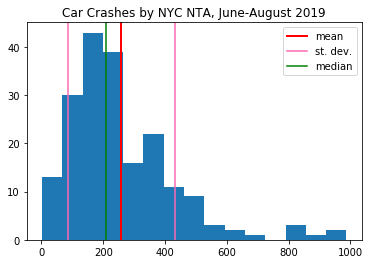

In [47]:
plt.hist(ntas_pop_crashes['crashes'], bins = 15)
plt.axvline(np.mean(ntas_pop_crashes['crashes']), linewidth = 2, color = 'r', label = 'mean')
plt.axvline(np.mean(ntas_pop_crashes['crashes']) - np.std(ntas_pop_crashes['crashes']), color = 'hotpink', label = 'st. dev.')
plt.axvline(np.mean(ntas_pop_crashes['crashes']) + np.std(ntas_pop_crashes['crashes']), color = 'hotpink')
plt.axvline(np.median(ntas_pop_crashes['crashes']), color = 'g', label = 'median')

plt.title("Car Crashes by NYC NTA, June-August 2019")
plt.legend()

# Question 5

In general, many of the NTAs with the most total pedestrians & cyclists injured/killed (PCIK) in car accidents are also those with the highest per capita rate. For example, much of lower and midtown Manhattan rank in the top quintile of both total and per capita PCIK. However, there are some exceptions to this. The Bronx is the most notable, with many NTAs especially in the central and north Bronx ranking low by total PCIK but very high on the per capita graph. There are also a number of neighborhoods in eastern Queens that follow a similar progression. This indicates that these neighborhoods have relatively low populations, but see a lot of cyclists and pedestrians hurt by car accidents. By contrast, quite a few NTAs in Brooklyn are in the top quintile of total PCIK but fall to the middle of the pack by per capita PCIK. This indicates the opposite - these neighborhoods presumably have relatively large populations to balance out the high frequency of pedestrians and cyclists involved in car accidents. 

From a planning perspective, those neighborhoods with high per capita PCIK despite low total amounts should be worrisome. This is likely an indication that sidewalks, crosswalks and bike lanes need to be improved in those areas. 

In [22]:
crash_nta["peds_casualties"] = crash_nta['number_of_pedestrians_injured'] + crash_nta['number_of_pedestrians_killed'] + crash_nta['number_of_cyclist_injured'] + crash_nta['number_of_cyclist_killed']

crash_ped_nta = crash_nta[['ntacode', 'peds_casualties']].groupby('ntacode').agg('sum')
crash_ped_nta.head()

,peds_casualties
ntacode,
BK09,4
BK17,32
BK19,11
BK21,19
BK23,10


In [23]:
ntas_pop_crash_peds = pd.merge(ntas_pop_crashes, crash_ped_nta, on='ntacode', how='left')
ntas_pop_crash_peds["ped_casualties_percap"] = np.where(ntas_pop_crash_peds["population"] > 0, ntas_pop_crash_peds["peds_casualties"] / ntas_pop_crash_peds["population"] * 100000, 0)

ntas_pop_crash_peds.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,borough,year,fips_county_code,nta_name,population,crashes,peds_casualties,ped_casualties_percap
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",Brooklyn,2010,47,Borough Park,106357,319,36,33.848266
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904872,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",Queens,2010,81,Murray Hill,51739,219,15,28.991670
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712132,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",Queens,2010,81,East Elmhurst,23150,157,7,30.237581
3,3.0,Brooklyn,047,BK95,Erasmus,1.452260e+07,18756.701865,"POLYGON ((-73.94826 40.63861, -73.94923 40.638...",Brooklyn,2010,47,Erasmus,29938,191,13,43.423074
4,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335600,"POLYGON ((-73.75726 40.71814, -73.75589 40.716...",Queens,2010,81,Hollis,20269,98,5,24.668213


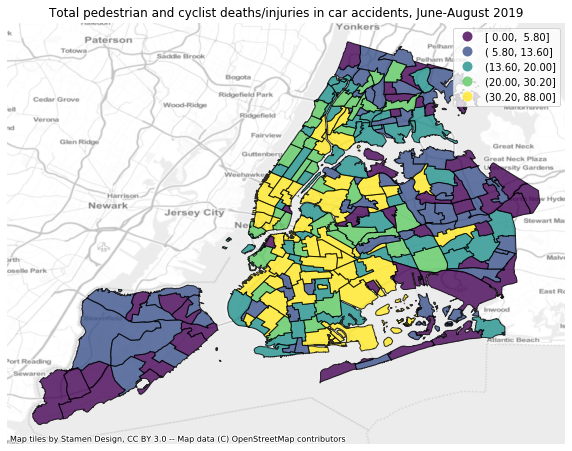

In [24]:
plot = ntas_pop_crash_peds.plot(figsize = (10,10), column = 'peds_casualties', scheme = 'quantiles', edgecolor = 'k', alpha = 0.8, legend = True)
ctx.add_basemap(ax = plot, source=ctx.providers.Stamen.TonerLite, crs='epsg:4326', alpha=0.5)

plt.axis(False)
plt.title("Total pedestrian and cyclist deaths/injuries in car accidents, June-August 2019")
plt.show()

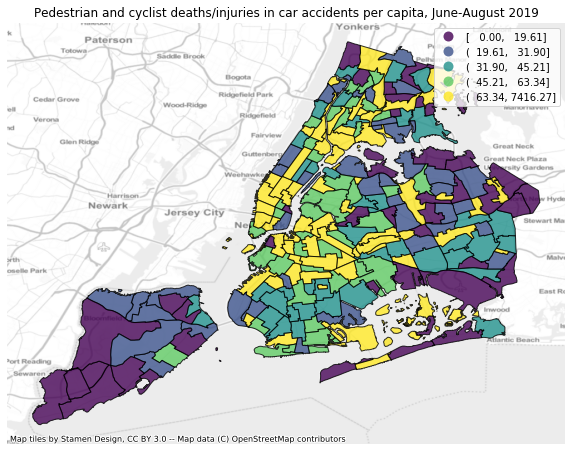

In [25]:
plot = ntas_pop_crash_peds.plot(figsize = (10,10), column = 'ped_casualties_percap', scheme = 'quantiles', edgecolor = 'k', alpha = 0.8, legend = True)
ctx.add_basemap(ax = plot, source=ctx.providers.Stamen.TonerLite, crs='epsg:4326', alpha=0.5)

plt.axis(False)
plt.title("Pedestrian and cyclist deaths/injuries in car accidents per capita, June-August 2019")
plt.show()